<a href="https://colab.research.google.com/github/shengyi2/spectrum_analysis/blob/main/96_well_plate_screening_for_blue_or_red_shift_FPs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Excel file
- Define functions and import modules
- this part needs to be run correctly before the next section
- need to choose a file for upload after running the 3rd cell

In [ ]:
# import modules 
from google.colab import files
import pandas as pd
import numpy as np

In [ ]:
# open the excel or csv file
def import_Colab(variable):
  print('Import',variable,'data')
 
  uploaded = files.upload()

  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    # read excel
  xls = pd.ExcelFile(fn)  

  return xls

In [ ]:

# import Excel file with multiple sheets
xls =import_Colab('96-well screening')

Import 96-well screening data


Saving test_file.xlsx to test_file.xlsx
User uploaded file "test_file.xlsx" with length 73211 bytes


# Organize data in the Excel
  - separate sheets in the Excel files and store in the dictionary Data_sheet

In [ ]:
xls.sheet_names

['Sheet2', 'Sheet3', 'Sheet4', 'Sheet1']

In [ ]:
Data_sheet={}
i=0
for name in xls.sheet_names:
  Data_sheet[i]=pd.read_excel(xls, name)
  i+=1
Data_sheet

{0:    SAFIRE II;   Serial number: 501000006;   Firmware: V 1.35 08/2005 Safire2;   XFLUOR4SAFIREII Version: V 4.62n  ... Unnamed: 97
 0                                               Date:                                                             ...         NaN
 1                                               Time:                                                             ...         NaN
 2                                                 NaN                                                             ...         NaN
 3                                             Label 1                                                             ...         NaN
 4                                   Measurement mode:                                                             ...         NaN
 ..                                                ...                                                             ...         ...
 65                                                630                          

# Cleaning data (Trimming the unnecessary part)

In [ ]:
# trimming the table with NaN
def trim(df):
  # Drop rows with setting parameters
  df=df.dropna()
  # reset row index (0  1 2 3 4...)
  df=df.reset_index()
  df=df.drop('index',axis=1)
  # replacing column index with first row (Wavelength: A1 A2 A3 ....)
  df.columns=df.iloc[0,:]
  df=df.drop(0,axis=0)
  return df



In [ ]:
drop_sheet=[]
for index in Data_sheet:
# remove sheet with limited rows (aborted trials or empty sheets)
# Trim the others in an organized fashion
  if Data_sheet[index].shape[0]<40: 
  # let's set the limit at 40, anything less than 40 is considered aborted
  # edit the row number if you need to change the limit
    drop_sheet.append(index) #store the indeces of sheets to be dropped
  else:
    Data_sheet[index]=trim(Data_sheet[index]) #clean good data
for index in drop_sheet:
  del Data_sheet[index] # drop aborted or empty sheets
Data_sheet

{0: 0  Wavelength:     A1     A2     A3     A4  ...    H9   H10   H11   H12       Em
 1          485    722   1060    739    698  ...   208   201   236   212   1.2555
 2          490   2002   2432   2367   2217  ...   546   568   541   569  1.19267
 3          495   5116   5421   4853   4878  ...  1550  1501  1555  1514   1.1521
 4          500  13076  12389  11509  10972  ...  3453  3464  3474  3429  1.12473
 5          505  22327  23912  22411  21029  ...  5843  5787  5993  5878  1.10743
 6          510  34065  34766  32318  30518  ...  8684  8539  8759  8555  1.09993
 7          515  35623  37663  35147  33231  ...  8746  8572  8754  8620  1.09807
 8          520  29804  30443  28556  26695  ...  6677  6620  6839  6703  1.10243
 9          525  21494  23817  22239  20620  ...  5280  5237  5326  5183  1.11023
 10         530  17487  18353  17197  16116  ...  4081  4011  4149  4030  1.12073
 11         535  13852  14834  13681  13092  ...  3272  3246  3354  3284  1.13413
 12         5

In [ ]:
# drop the correction column Em
for index in Data_sheet:
  Data_sheet[index]=Data_sheet[index].drop('Em', axis=1)


In [ ]:
# convert objects to integers
for index in Data_sheet:
  Data_sheet[index]=Data_sheet[index].astype(str).astype(int)

In [ ]:
Data_sheet[0].describe()

,Wavelength:,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,D1,D2,D3,...,E9,E10,E11,E12,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,567.500000,8067.235294,8480.088235,7901.941176,7438.647059,7719.117647,7727.882353,7602.764706,7747.941176,7550.617647,7541.147059,6604.647059,7406.558824,458.882353,333.205882,292.176471,8114.617647,7830.470588,8127.470588,7502.235294,7728.588235,7606.705882,8893.970588,8524.382353,8530.323529,8036.088235,8118.558824,8290.176471,7924.441176,7764.617647,7900.205882,8052.500000,8092.058824,7807.676471,8251.411765,7265.500000,7591.058824,8579.588235,8779.029412,9063.705882,...,6636.058824,9470.617647,9434.941176,9206.588235,8358.941176,8111.294118,10461.470588,11284.529412,9000.617647,8441.941176,8596.970588,664.147059,8423.411765,8542.882353,8816.058824,8519.352941,1798.411765,1761.352941,1784.617647,9832.764706,1978.176471,1966.500000,1991.058824,2011.970588,1858.411765,2055.852941,2061.617647,2072.088235,318.764706,745.558824,444.441176,1786.705882,1692.970588,1748.588235,2012.588235,2025.852941,1972.676471,1948.205882,2001.205882,1961.882353
std,49.791231,10105.729203,10545.937156,9851.738185,9263.773571,9570.456196,9632.506171,9438.959785,9664.830140,9394.570331,9379.288366,8242.473507,9211.949372,570.726691,413.414883,359.508795,10090.040262,9762.486228,10114.720408,9337.619631,9637.626129,9458.063001,11054.405798,10599.205105,10587.390919,9986.982956,10088.105030,10328.708871,9887.249212,9651.335116,9831.421284,10024.991188,10059.342517,9734.827065,10255.162638,9052.567151,9466.473443,10792.481382,10991.668061,11373.526320,...,8393.524654,11888.893057,11795.950764,11547.403303,10480.829651,10187.154417,13088.621256,14109.149237,11307.434058,10610.778334,10825.959050,842.158415,10604.226250,10781.083632,11078.952040,10708.883027,2254.376029,2204.286030,2230.800454,12279.338940,2484.894723,2460.933122,2501.527944,2532.132644,2337.159946,2579.454125,2584.722598,2597.250019,384.131532,915.132486,544.211478,2234.443223,2121.116065,2196.248249,2516.357976,2543.920312,2476.408271,2441.852920,2503.133282,2455.100810
min,485.000000,197.000000,179.000000,183.000000,170.000000,179.000000,173.000000,173.000000,187.000000,177.000000,189.000000,140.000000,164.000000,12.000000,10.000000,10.000000,185.000000,183.000000,207.000000,177.000000,175.000000,162.000000,199.000000,197.000000,205.000000,187.000000,185.000000,187.000000,173.000000,177.000000,172.000000,189.000000,199.000000,179.000000,189.000000,168.000000,181.000000,205.000000,217.000000,219.000000,...,148.000000,229.000000,227.000000,207.000000,201.000000,189.000000,237.000000,264.000000,197.000000,197.000000,187.000000,12.000000,205.000000,201.000000,203.000000,225.000000,43.000000,44.000000,46.000000,241.000000,53.000000,47.000000,51.000000,43.000000,45.000000,49.000000,47.000000,39.000000,10.000000,19.000000,12.000000,39.000000,45.000000,45.000000,41.000000,47.000000,51.000000,49.000000,53.000000,45.000000
25%,526.250000,785.500000,1004.500000,778.250000,737.500000,889.250000,764.500000,858.750000,767.00000

# Find the maximum of each column of each spreadsheet

In [ ]:
maximum_series={}
maximum_list={}
for index in Data_sheet:
  maximum_series[index]=Data_sheet[index].max()
  maximum_list[index]=maximum_series[index][1:].tolist()

In [ ]:
maximum_series


{0: 0
 Wavelength:      650
 A1             35623
 A2             37663
 A3             35147
 A4             33231
                ...  
 H8              8920
 H9              8746
 H10             8572
 H11             8759
 H12             8620
 Length: 97, dtype: int64, 1: 0
 Wavelength:      650
 A1             35623
 A2             37663
 A3             35147
 A4             33231
                ...  
 H8              8920
 H9              8746
 H10             8572
 H11             8759
 H12             8620
 Length: 97, dtype: int64}

In [ ]:
maximum_list

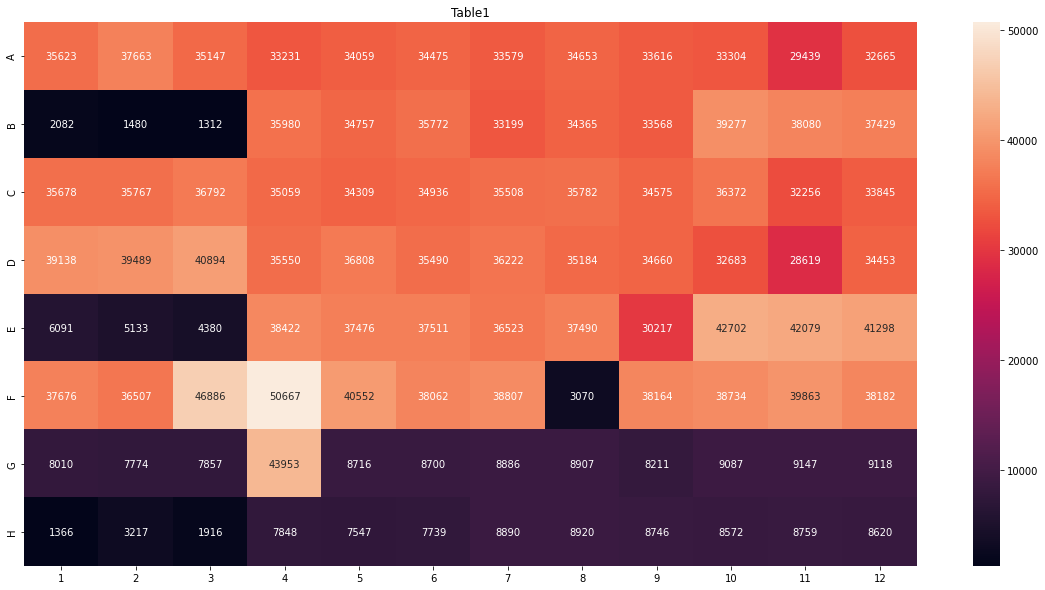

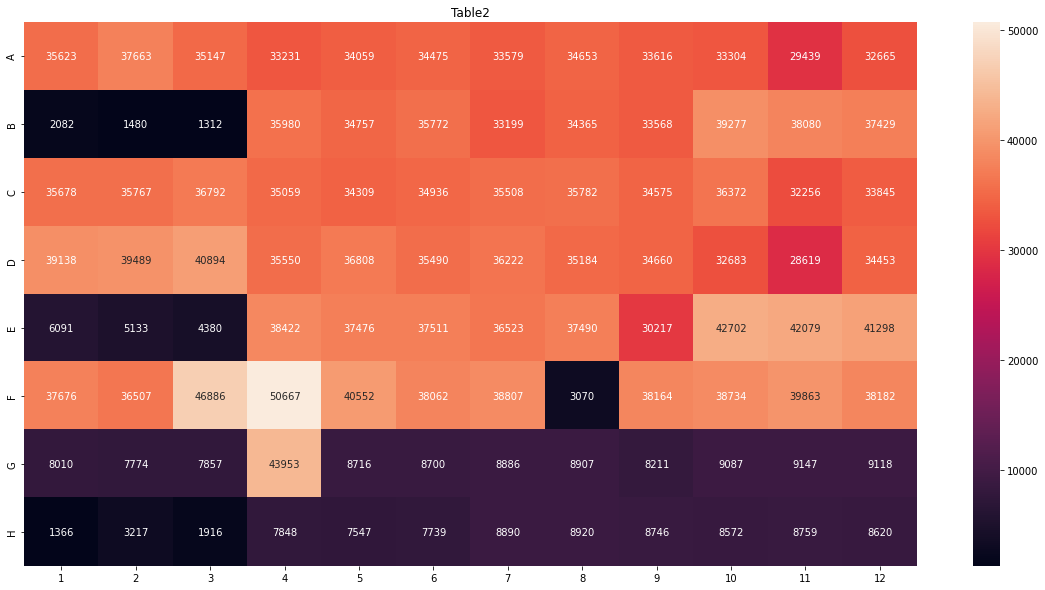

In [ ]:
graph_list={}
graph_table={}
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for index in Data_sheet:

  graph_list[index] = [maximum_list[index][i:i+12] for i in range(0, len(maximum_list[0]), 12)]
  Index= ['A','B','C','D','E','F','G','H']
  Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
  graph_table[index]= pd.DataFrame(graph_list[index], columns=Cols, index=Index)


  fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
  ax.set_title('Table'+str(index+1))
  sns.heatmap(graph_table[0], annot=True,fmt='.0f',ax=ax)
  
  fig.savefig('maximum_heatmap '+str(index+1)+'.png')

# Find the peak wavelength of each column of each spreadsheet

In [ ]:
maximum_series={}
maximum_rowid_list={}
maximum_peak_nm={}
for index in Data_sheet:
  maximum_series[index]=Data_sheet[index].idxmax()
  maximum_rowid_list[index]=maximum_series[index][1:].tolist()
  maximum_peak_nm[index]=Data_sheet[index].loc[:,'Wavelength:'][maximum_rowid_list[index]].tolist()

In [ ]:
maximum_peak_nm

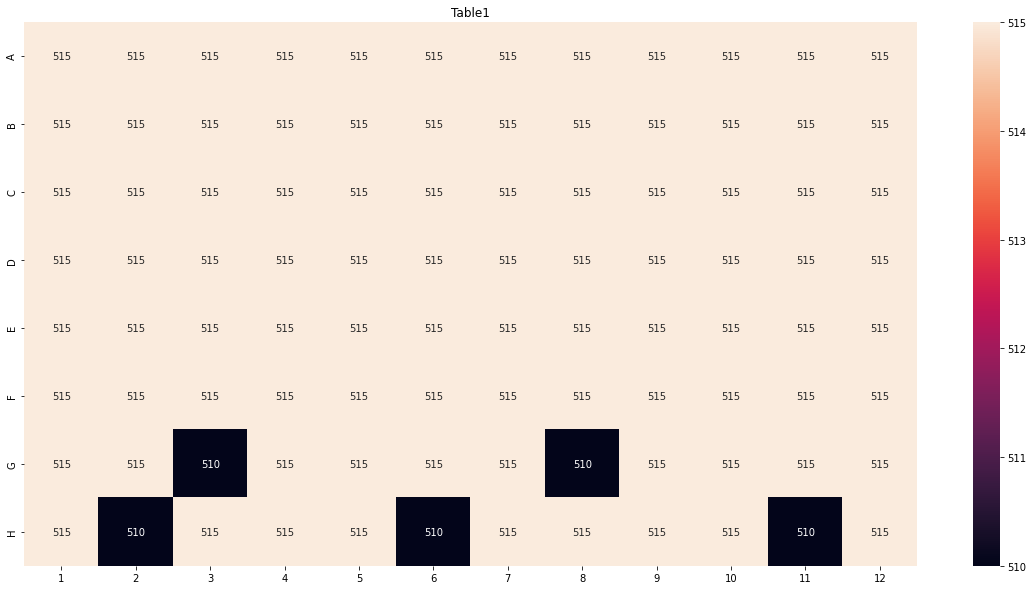

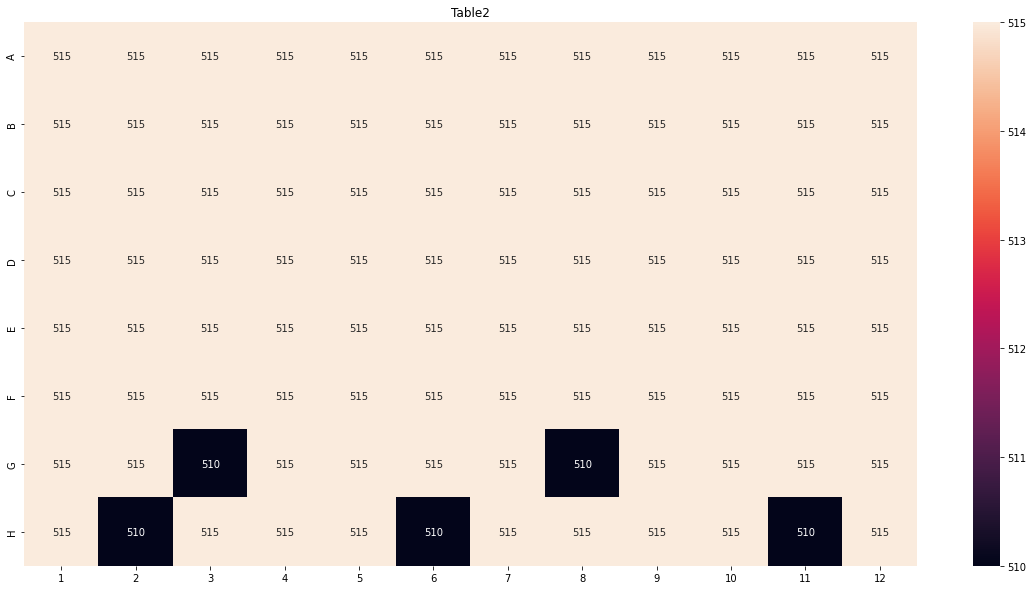

In [ ]:
graph_list={}
graph_table={}
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for index in Data_sheet:

  graph_list[index] = [maximum_peak_nm[index][i:i+12] for i in range(0, len(maximum_peak_nm[0]), 12)]
  Index= ['A','B','C','D','E','F','G','H']
  Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
  graph_table[index]= pd.DataFrame(graph_list[index], columns=Cols, index=Index)


  fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
  ax.set_title('Table'+str(index+1))
  sns.heatmap(graph_table[0], annot=True,fmt='.0f',ax=ax)
  
  fig.savefig('maximum_wavelength '+str(index+1)+'.png')

# X, Y plot 
- x: peak wavelength
- y: brightness

In [ ]:
# create names from A1 to H12
Index= ['A','B','C','D','E','F','G','H']
Cols = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=[]
for index in Index:
  for col in Cols:
 
    string=index+str(col)
    labels.append(string)


In [ ]:
XY_data={}
figure_table={}
import plotly.express as px
for index in Data_sheet:

  XY_data[index] = {'Labels':labels,'Wavelength(nm)': maximum_peak_nm[index], 'Fluorescence intensity': maximum_list[index]}
  figure_table[index] = pd.DataFrame(data=XY_data[index])
  figure_table[index]
  fig = px.scatter(figure_table[index], x="Wavelength(nm)", y="Fluorescence intensity", 
                title="Table "+str(index+1),hover_name="Labels", hover_data=["Wavelength(nm)", "Fluorescence intensity"])
  fig.show()
  fig.write_html('Fluorescence vs. peak wavelength '+str(index+1)+'.html')